##**TELCO CHURN PREDICTION BY BLESSING OSUAGWU (GH1038684)**

**Problem Statement:**

As a newly appointed data scientist my role is to help solve the business problem of the telecom company, which is to predict customer churn (whether a customer will leave or stay). If the company knows who might leave, they can offer discounts or better services to retain them.

**Benefits:**

Keeping customers is cheaper than getting new ones. Reducing churn can save millions of dollars yearly, and understanding why customers leave can help improve marketing and service plans.

**Data Collection:**

The dataset for this project is sourced from on Kaggle (https://www.kaggle.com/datasets/blastchar/telco-customer-churn). This dataset includes customer demographics, the service each customer signed up for, customer account information, etc.

**Machine Learning Task:**

This is a binary (Yes or No) classification task. The prediction of the model will be if a customer will churn ("Yes") or stay ("No"). The effectiveness of the model will be judged using metrics like accuracy, precision, recall, F1-score, and ROC AUC. The aim is to develop a model that can accurately predict customer churn with a high degree of precision and recall, enabling targeted interventions. Understanding the reason behind customer churn is crucial. Therefore, this project will not only focus on prediction, but also on identifying major factors that bring about churn, providing actionable insights for the telecom company.

###**Import** **Libraries**

In [ ]:
import pandas as pd
import missingno as mno
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.compose
import sklearn.model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve, f1_score

###**Data Collection**

In [ ]:
#Load dataset derived from Kaggle

df = pd.read_csv("/content/Telecom_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###**Data Exploration**

In [ ]:
#Brief summary of the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [ ]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#Check for missing (empty) values in the dataset.

df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

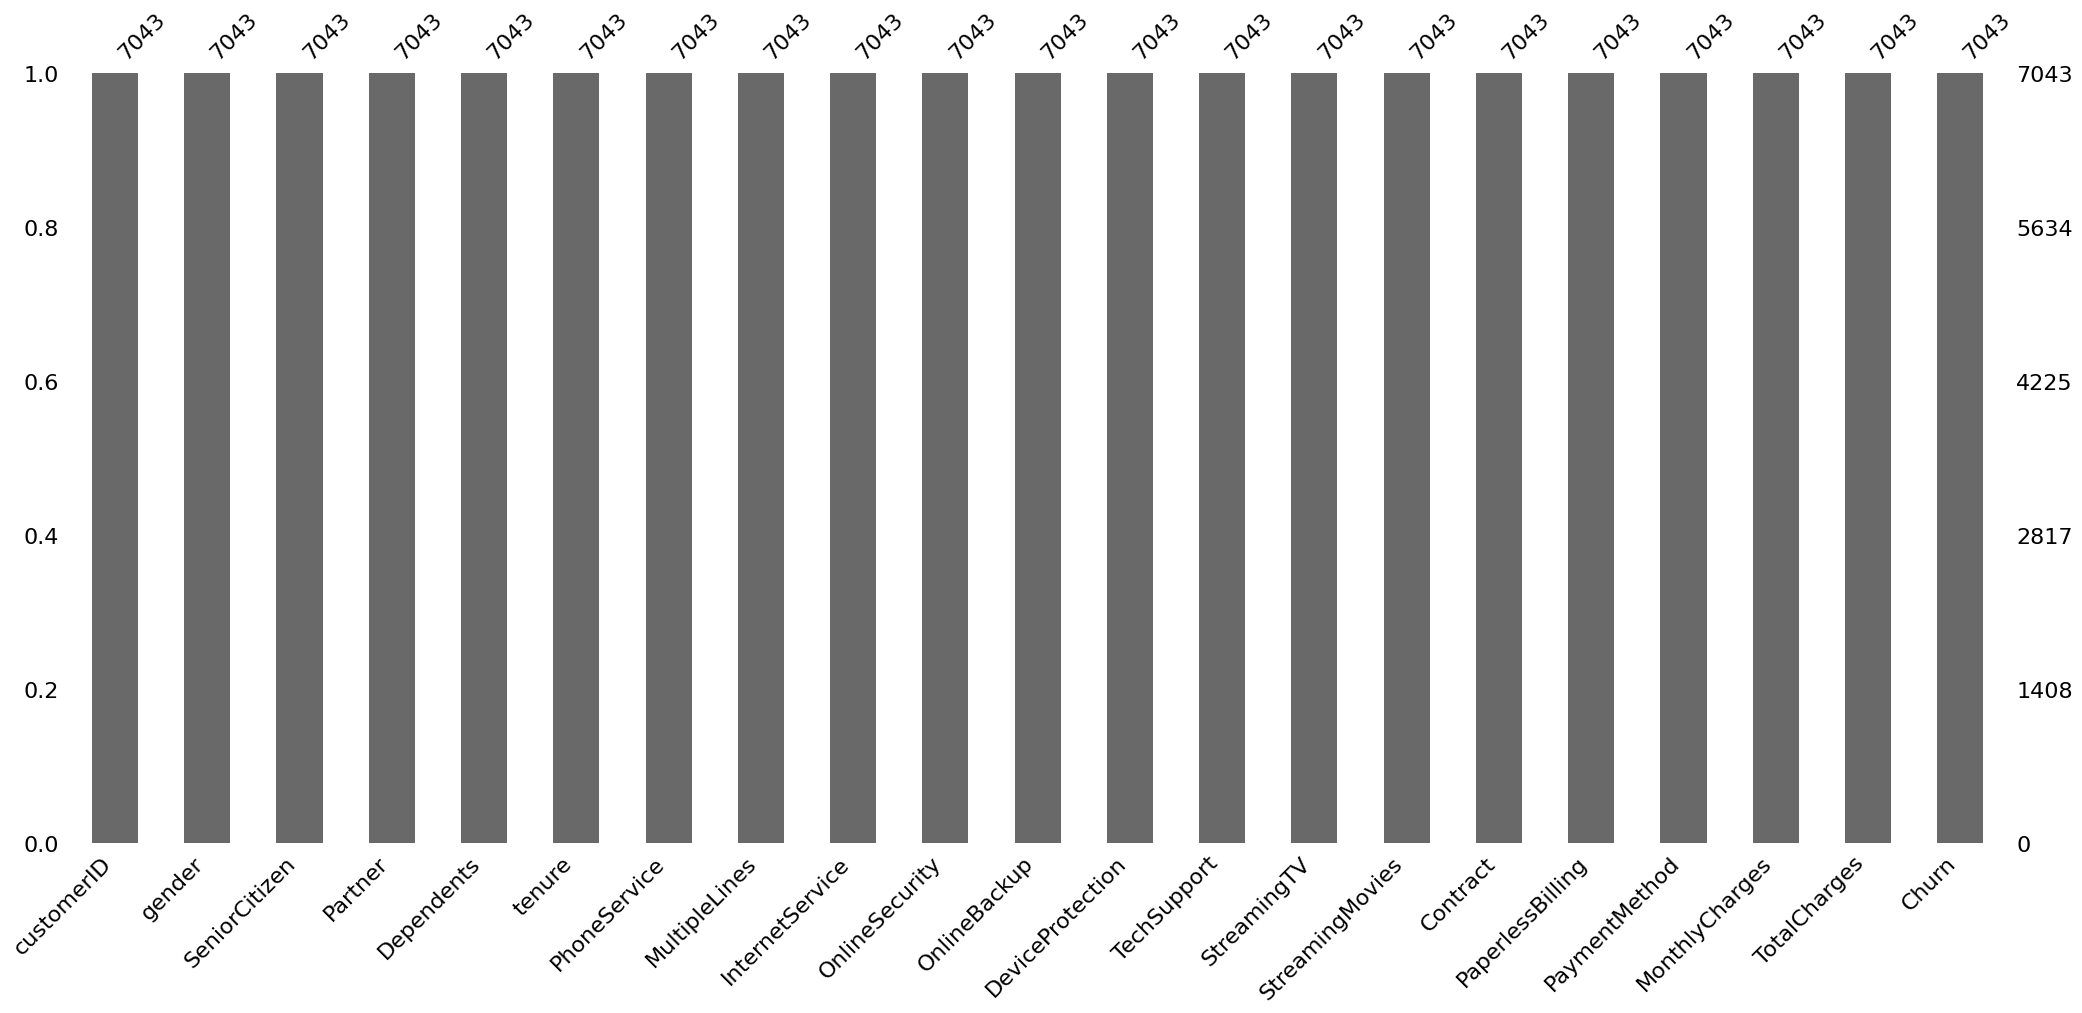

In [ ]:
#visualizing the data distribution.
mno.bar(df)

In [ ]:
#See the type of data in each column, such as numbers (int64, float64) or text.

df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

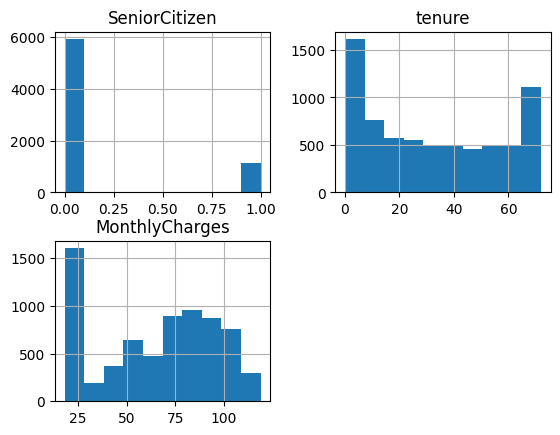

In [ ]:
#Create histograms for all numerical columns, to visualize how the data is distributed to help spot trends or patterns.
# Histograms Summary:
#-SeniorCitizen: Most customers are not senior citizens.
#-Tenure: Many customers are new (low tenure), but some are long-term (high tenure).
#-MonthlyCharges: Most customers pay low charges, but a few have higher payments.
#-These plots help to understand customer distribution and spending patterns.

df.hist()

###**Data Preprocessing**

In [ ]:
#Spliting of dataset to test and train to see how well the model works on new data. The training set is used to teach the model, while the test set is used to see how well it makes predictions.

df_train,df_test = sklearn.model_selection.train_test_split(df)

print("df.size:",df.shape)
print("df_train.size:",df_train.shape)
print("df_test.size:",df_test.shape)

df.size: (7043, 21)
df_train.size: (5282, 21)
df_test.size: (1761, 21)


In [ ]:
# Convert TotalCharges to a number as it shows object in the dataset which means that it isn't in a numeric form.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill in any NaN (missing) values in TotalCharges with the average (median) value of that column.
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [ ]:
#Remove customerID and Churn since they are not useful for prediction.
X_train = df.drop(columns=['customerID', 'Churn'])
X_test = df.drop(columns=['customerID', 'Churn'])

# Convert Churn column to binary (Yes = 1, No = 0)
y_train = (df['Churn'] == 'Yes').astype(int)
y_test = (df['Churn'] == 'Yes').astype(int)

###**Engineering Feature**

In [ ]:
#Prepare the data by converting text columns into numeric values and scaling numerical columns to improve the model performance.
categorical_attributes = X_train.select_dtypes(include=['object']).columns
numerical_attributes = X_train.select_dtypes(include=['int64','float64']).columns

#OneHotEncoder will turn Categories to binary columns and Standardscaler scales the numbers so that they all have the same range, making it easier for the model to work with.
ct = sklearn.compose.ColumnTransformer(
    transformers=[
        ('encoding', sklearn.preprocessing.OneHotEncoder(), categorical_attributes),
        ('scaling', sklearn.preprocessing.StandardScaler(), numerical_attributes)
    ]

)


#Fit and Transform Data
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print("df_train.size:",df_train.shape)
print("df_test.size:",df_test.shape)

df_train.size: (5282, 21)
df_test.size: (1761, 21)


###**Model Training**

In [ ]:
#This dataset is imbalanced, to handle Class Imbalance, SMOTE will be used as it generates synthetic examples for the minority class to balance the dataset.

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# RFE is used to select the most important features by iteratively removing the least important ones.
# Here, Logistic Regression is used as the base estimator and select 20 important features.

selector = RFE(estimator=LogisticRegression(), n_features_to_select=20)
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test)

#Define Models and Parameter Grids for tuning
models = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42),
        "param_grid": {
            "C": [0.1, 1, 10],
            "penalty": ["l2"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "param_grid": {
            "max_depth": [5, 10, 15],
            "n_estimators": [100, 200, 300]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "param_grid": {
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7],
            "n_estimators": [100, 200, 300]
        }
    }
}

# Perform Hyperparameter Tuning and Train Models using GridSearchCv. GridSearchCv performs cross-validation to sort the best hyperparameters for each model.
best_models = {}
for model_name, config in models.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(
        estimator=config["model"],
        param_grid=config["param_grid"],
        cv=5,
        scoring="roc_auc",
        n_jobs=-1
    )
    grid_search.fit(X_train_selected, y_train_resampled)

    #Store the best model for each algorithm
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_:.4f}\n")

print("All trained and tuned models.")

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
Best cross-validation score for Logistic Regression: 0.8577

Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 15, 'n_estimators': 300}
Best cross-validation score for Random Forest: 0.9140

Tuning Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best cross-validation score for Gradient Boosting: 0.9226

All trained and tuned models.


###**Model Evaluation**

In [ ]:
#Evaluate each trained model on the test data
for model_name, model in best_models.items():
    print(f"\n{model_name} Model Evaluation:")

    #Predict class labels and probabilities
    y_pred = model.predict(X_test_selected)
    y_pred_proba = model.predict_proba(X_test_selected)[:, 1]

    #Print performance metrics
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Model Evaluation:
Accuracy: 0.7492545790146244
ROC AUC Score: 0.8462190981246934
F1-Score: 0.6260059296908089
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      5174
           1       0.52      0.79      0.63      1869

    accuracy                           0.75      7043
   macro avg       0.71      0.76      0.72      7043
weighted avg       0.80      0.75      0.76      7043

Confusion Matrix:
 [[3799 1375]
 [ 391 1478]]

Random Forest Model Evaluation:
Accuracy: 0.92134033792418
ROC AUC Score: 0.9754456109828478
F1-Score: 0.8670825335892515
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94      5174
           1       0.79      0.97      0.87      1869

    accuracy                           0.92      7043
   macro avg       0.89      0.94      0.91      7043
weighted avg       0.93      0.92      0.92      7043

###**Summary of the Pipeline**

**Strengths:**

SMOTE: Balanced the class distribution, making predictions for the minority class better (Churned Customers).

GridSearchCV: Improved model performance by finding the best hyperparameters for each algorithm.

Ensemble Methods:Both Random Forest and Gradient Boosting were highly accurate and got robust evaluation scores, making them reliable for churn prediction.

**Limitations:**

Logistic Regression: Is easy to understand but not good at predicting the minority class.

Random Forest and Gradient Boosting: It is possible to overfit if they become too complex.

**Business Implications:**

Random Forest and Gradient Boosting are recommended for predicting customer churn due to their high accuracy. These models can identify customers likely to leave (Class 0) and those likely to stay (Class 1), enabling targeted retention strategies.

Logistic Regression is easier to understand, but the other methods are more accurate.


**Recommendations:**

Feature Engineering: Additional data needs to incorporated on customer behavior, service usage patterns, and campaign interactions to improve model performance.

Model Deployment: Deploy the best-performing models (Random Forest or Gradient Boosting) and monitor their performance over time to ensure they remain effective.

Class Balance: Regularly check for class imbalance in new data and retrain models as needed to maintain prediction accuracy.

**Model Explainability:**

Logistic Regression is easy to understand. For the complex models (Random Forest and Gradient Boosting) tools like SHAP values or LIME can be used to interpret them and provide actionable insights to stakeholders.

**Conclusion:**

Best Models: Random Forest and Gradient Boosting are superior for accurate churn prediction, while Logistic Regression offers interpretability for understanding key features.

Future Improvements: Regular updates to the models, combined with enhanced feature engineering and ongoing monitoring, will further improve accuracy and ensure the models remain effective in predicting customer churn.

###**References:**
For libraries: Data analysis and visualization were conducted using Python libraries such as pandas, Matplotlib, SciKit-Learn etc.

Rahman, K. (2021) Python Data Visualization Essentials Guide: Become a Data Visualization expert by building strong proficiency in Pandas, Matplotlib, Seaborn, Plotly, Numpy, and Bokeh (English Edition). BPB Publications.

Sarkar, D., Bali, R. and Sharma, T. (2017) Practical Machine Learning with Python, Apress eBooks. https://doi.org/10.1007/978-1-4842-3207-1.


Pedregosa, F. et al. (2011) SciKit-Learn: Machine Learning in Python. https://jmlr.org/papers/v12/pedregosa11a.html.

Lemaître, G., Nogueira, F. and Aridas, C.K. (2017) Imbalanced-learn: A Python Toolbox to Tackle the Curse of Imbalanced Datasets in Machine Learning. https://jmlr.org/papers/v18/16-365.html.

Paper, D. (2021) TensorFlow 2.X in the colaboratory cloud, Apress eBooks. https://doi.org/10.1007/978-1-4842-6649-6.

Myler, L. (2016, June 8). Acquiring new customers is important, but retaining them accelerates profitable growth. Forbes. https://www.forbes.com/sites/larrymyler/2016/06/08/acquiring-new-customers-is-important-but-retaining-them-accelerates-profitable-growth/

Mouli, K.C. et al. (2024) 'An analysis on classification models for customer churn prediction,' Cogent Engineering, 11(1). https://doi.org/10.1080/23311916.2024.2378877.
